<a href="https://www.kaggle.com/code/aritra423/predicted-calories?scriptVersionId=240255605" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [2]:

# Load the files
train_df = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
submission_df = pd.read_csv('/kaggle/input/playground-series-s5e5/sample_submission.csv')

# Preview the data
train_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)
train_df['Sex_male']=train_df['Sex_male'].astype(int)
train_df.head()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_male
0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,1
1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,0
2,2,51,161.0,64.0,7.0,84.0,39.8,29.0,0
3,3,20,192.0,90.0,25.0,105.0,40.7,140.0,1
4,4,38,166.0,61.0,25.0,102.0,40.6,146.0,0


<Axes: >

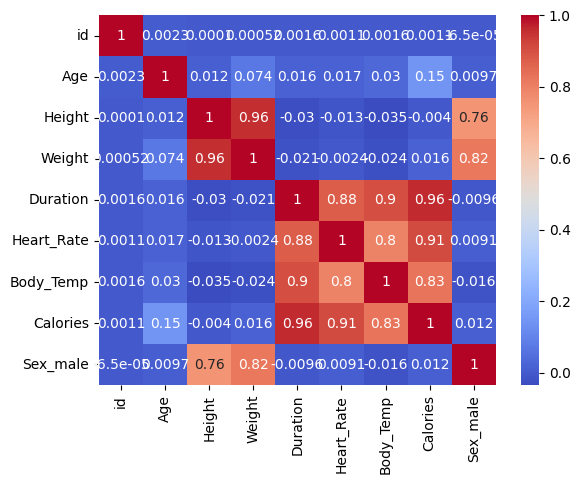

In [4]:
import seaborn as sns
correlation=train_df.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True)

In [5]:
y=train_df['Calories']
x = train_df.drop(columns=['Calories','id'])

In [6]:
x.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_male
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,0.499039
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,0.499999
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,0.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,0.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,0.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,1.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,1.000000


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Age         750000 non-null  int64  
 1   Height      750000 non-null  float64
 2   Weight      750000 non-null  float64
 3   Duration    750000 non-null  float64
 4   Heart_Rate  750000 non-null  float64
 5   Body_Temp   750000 non-null  float64
 6   Sex_male    750000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 40.1 MB


In [8]:
features_to_check = x.drop(columns=['Sex_male'])  

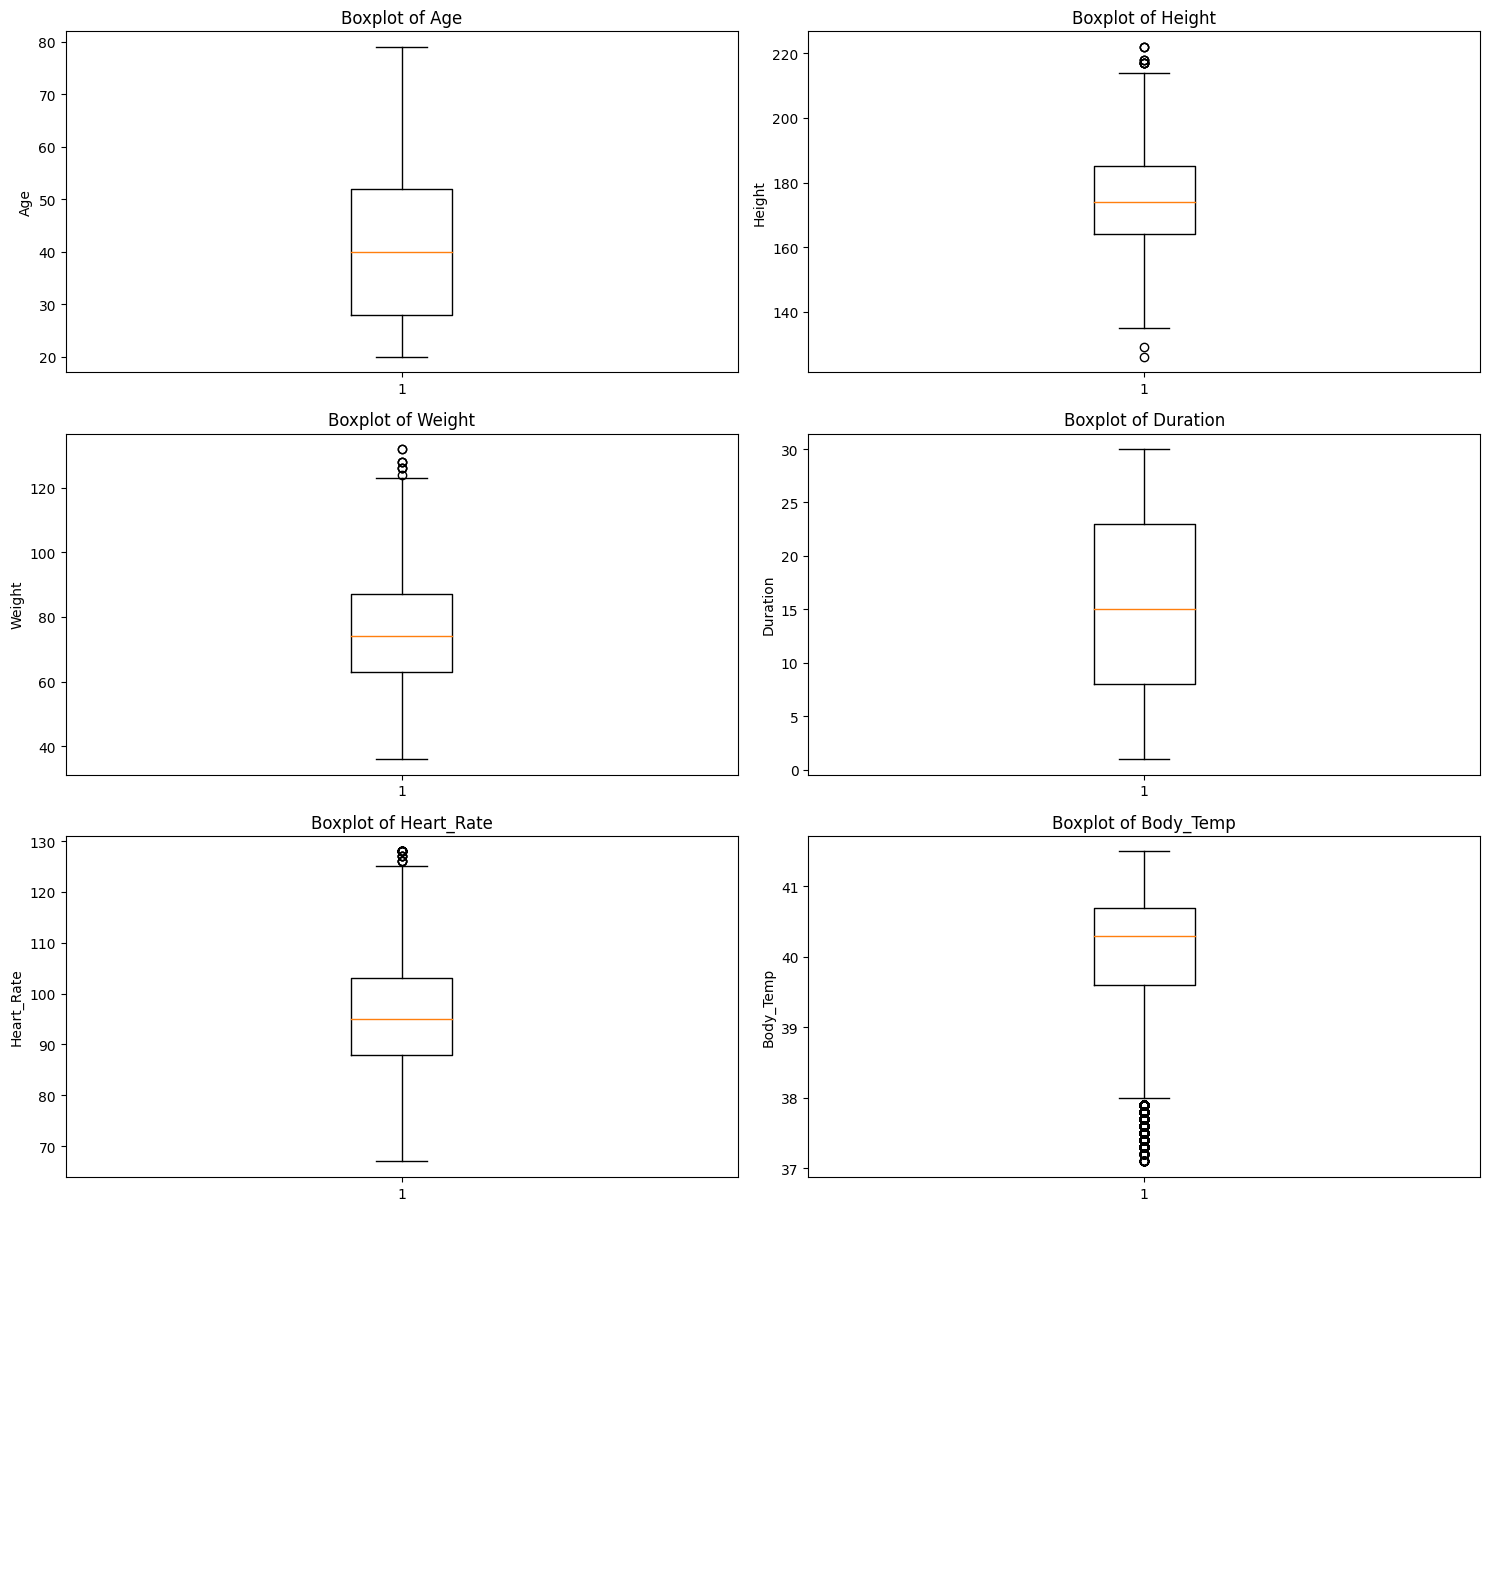

In [9]:
import matplotlib.pyplot as plt
num_features = features_to_check.shape[1]
rows = (num_features + 2) // 2
cols=2
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  

for i, col in enumerate(features_to_check.columns):
    axes[i].boxplot(features_to_check[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [10]:
Q1 = features_to_check.quantile(0.25)
Q3 = features_to_check.quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outlier_mask = (features_to_check < (Q1 - 1.5 * IQR)) | (features_to_check > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()
print("Outlier count per feature:")
print(outlier_counts)

Outlier count per feature:
Age               0
Height           14
Weight            9
Duration          0
Heart_Rate       36
Body_Temp     14919
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


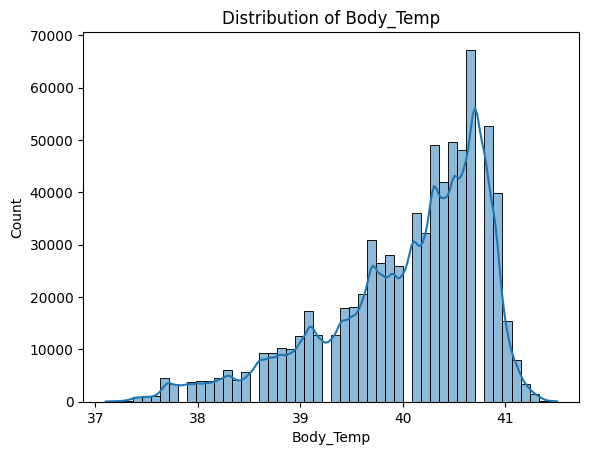

In [11]:

sns.histplot(features_to_check['Body_Temp'], bins=50, kde=True)
plt.title("Distribution of Body_Temp")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
import cupy as cp
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error

X_train_gpu = cp.array(X_train.values if isinstance(X_train, pd.DataFrame) else X_train)
y_train_gpu = cp.array(y_train.values if isinstance(y_train, pd.Series) else y_train)

model_xg = XGBRegressor(
    objective='reg:squaredlogerror',
    tree_method='hist',       # Use histogram-based algorithm
    device='cuda',            # Use GPU explicitly
    random_state=42,
    verbosity=0
)

# Hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

# Custom MSLE scorer
def msle(y_true, y_pred):
    y_true_np = cp.asnumpy(y_true) if isinstance(y_true, cp.ndarray) else y_true
    y_pred_np = cp.asnumpy(y_pred) if isinstance(y_pred, cp.ndarray) else y_pred
    return mean_squared_log_error(y_true_np, y_pred_np)

msle_scorer = make_scorer(msle, greater_is_better=False)

random_search = RandomizedSearchCV(
    estimator=model_xg,
    param_distributions=param_dist,
    n_iter=50,
    scoring=msle_scorer,
    cv=3,
    verbose=0,
    
    random_state=42,
    n_jobs=-1
)

# Fit the model using GPU arrays
random_search.fit(X_train_gpu, y_train_gpu)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cuda',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rat...
                                          num_parallel_tree=None,
                                          objective='reg:squaredlogerror', ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42,
                   scoring=make_scorer(msle, greater_is_better=False))

In [14]:
from sklearn.metrics import mean_squared_log_error

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
msle_value = mean_squared_log_error(y_test, y_pred)

print(f"Mean Squared Log Error (MSLE) on validation set: {msle_value:.6f}")

Mean Squared Log Error (MSLE) on validation set: 0.004640


Text(0.5, 1.0, 'XGBoost: Actual vs Predicted')

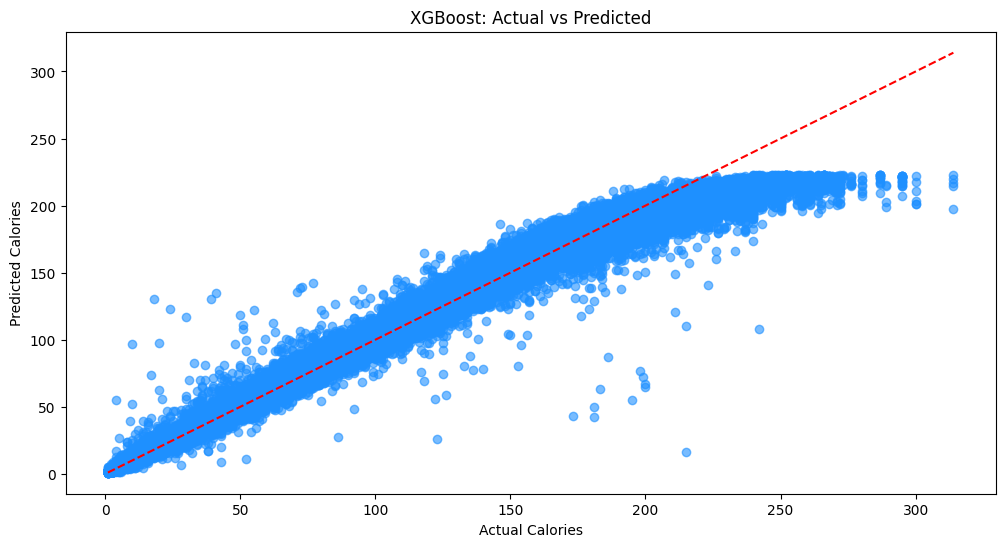

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('XGBoost: Actual vs Predicted')



In [16]:
test_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [17]:
test_df = pd.get_dummies(test_df, columns=['Sex'], drop_first=True)
test_df['Sex_male']=test_df['Sex_male'].astype(int)
x_final=test_df.drop(columns=['id'])
x_final.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_male
0,45,177.0,81.0,7.0,87.0,39.8,1
1,26,200.0,97.0,20.0,101.0,40.5,1
2,29,188.0,85.0,16.0,102.0,40.4,0
3,39,172.0,73.0,20.0,107.0,40.6,0
4,30,173.0,67.0,16.0,94.0,40.5,0


In [18]:
y_finalxg = best_model.predict(x_final)
y_finalxg = [round(val, 3) for val in y_finalxg]

In [19]:
final=pd.DataFrame({
    'id':test_df['id'],
    'Calories':y_finalxg
})

In [20]:
final.head()

,id,Calories
0,750000,25.806000
1,750001,107.950996
2,750002,89.367996
3,750003,128.505005
4,750004,74.556000


In [21]:
submission_df.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


In [22]:
final.to_csv('mysubmission.csv',index=False)

In [23]:
import os
print(os.getcwd())

/kaggle/working


In [24]:
import os
os.listdir('/kaggle/working')

['__notebook__.ipynb', 'mysubmission.csv']